### Biopsy gegevens inlezen

In [33]:
import IPython
import pandas as pd

IPython.InteractiveShell.ast_node_interactivity = 'all'

biopsy = pd.read_csv('data/biopsy.csv', sep=";", index_col=0)
display(biopsy.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,benign
1002945,5,4,4,5,7,10.0,3,2,1,benign
1015425,3,1,1,1,2,2.0,3,1,1,benign
1016277,6,8,8,1,3,4.0,3,7,1,benign
1017023,4,1,1,3,2,1.0,3,1,1,benign


### Input data maken
We verwijderen de laatste kolom (genaamd 'class'), deze bevat de aard van het gezwel (goedaardig vs. kwaadaardig)

In [34]:
X = biopsy.dropna().drop(columns=['class'])
y = biopsy.dropna()['class']
display(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
ID,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1
1002945,5,4,4,5,7,10.0,3,2,1
1015425,3,1,1,1,2,2.0,3,1,1
1016277,6,8,8,1,3,4.0,3,7,1
1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1
841769,2,1,1,1,2,1.0,1,1,1
888820,5,10,10,3,7,3.0,8,10,2


### PCA model maken met pca library
Niet vergeten van `pip install pca` te doen


In [35]:
from pca import pca

# n_components kan een float zijn tussen 0 en 1, of een integer
# als het een float is, dan is het het percentage van de variantie dat je wil behouden
# als het een integer is, dan is het het aantal dimensies dat je wil behouden
model = pca(normalize=True, n_components=9)  # 90% van de variantie overhouden in de PC componenten
# model = pca(normalize=True, n_components=4) # 4 hoofdcomponenten overhouden / 4 dimensie overhouden

out = model.fit_transform(X, verbose=False)

In [36]:
pd.DataFrame(zip(out['variance_ratio'], out['explained_var']),
             index=[f'PC{i + 1}' for i in range(len(out['variance_ratio']))],
             columns=['variance_ratio', 'explained_var']).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variance_ratio,0.6555,0.086216,0.059917,0.051070,0.042253,0.033542,0.032711,0.028971,0.00982
explained_var,0.6555,0.741716,0.801633,0.852703,0.894956,0.928498,0.961209,0.990180,1.00000


,V1,V2,V3,V4,V5,V6,V7,V8,V9
PC1,0.302063,0.380793,0.377583,0.332724,0.336234,0.335068,0.345747,0.335591,0.230206
PC2,-0.140801,-0.046640,-0.082422,-0.052094,0.164404,-0.261261,-0.228077,0.033966,0.905557
PC3,-0.866372,0.019938,-0.033511,0.412647,0.087743,-0.000691,0.213072,0.134248,-0.080492
PC4,-0.107828,0.204255,0.175866,-0.493173,0.427384,-0.498618,-0.013047,0.417113,-0.258988
PC5,-0.080321,0.145653,0.108392,0.019569,0.636693,0.124773,-0.227666,-0.690210,-0.105042
PC6,0.242518,0.139032,0.074527,0.654629,-0.069309,-0.609221,-0.298897,-0.021518,-0.148345
PC7,0.008516,0.205434,0.127209,-0.123830,-0.211018,-0.402790,0.700417,-0.459783,0.132117
PC8,0.247707,-0.436300,-0.582727,0.163434,0.458669,-0.126653,0.383719,0.074012,-0.053537
PC9,0.002747,0.733211,-0.667481,-0.046019,-0.066891,0.076510,-0.062241,0.022079,-0.007496


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variance_ratio,0.6555,0.086216,0.059917,0.051070,0.042253,0.033542,0.032711,0.028971,0.00982
explained_var,0.6555,0.741716,0.801633,0.852703,0.894956,0.928498,0.961209,0.990180,1.00000


,PC,feature,loading,type
0,PC1,V2,0.380793,best
1,PC2,V9,0.905557,best
2,PC3,V1,-0.866372,best
3,PC4,V6,-0.498618,best
4,PC5,V8,-0.690210,best
5,PC6,V4,0.654629,best
6,PC7,V7,0.700417,best
7,PC8,V3,-0.582727,best
8,PC9,V2,0.733211,best
9,PC5,V5,0.636693,weak


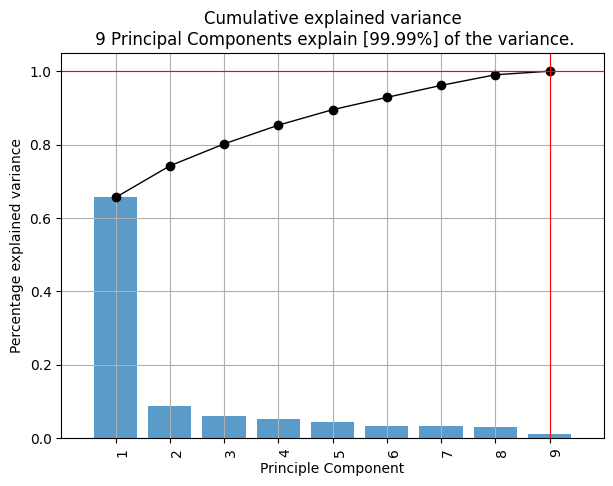

<Figure size 640x480 with 0 Axes>

In [37]:

A_mm = out['loadings']  # matrix met de coefficiënten van de PCA analyse
pd.DataFrame(A_mm)
pd.DataFrame(zip(out['variance_ratio'], out['explained_var']),
             index=[f'PC{i + 1}' for i in range(len(out['variance_ratio']))],
             columns=['variance_ratio', 'explained_var']).T
out['topfeat']
_ = model.plot(figsize=(7, 5))

[pca] >Plot PC1 vs PC2 with loadings.


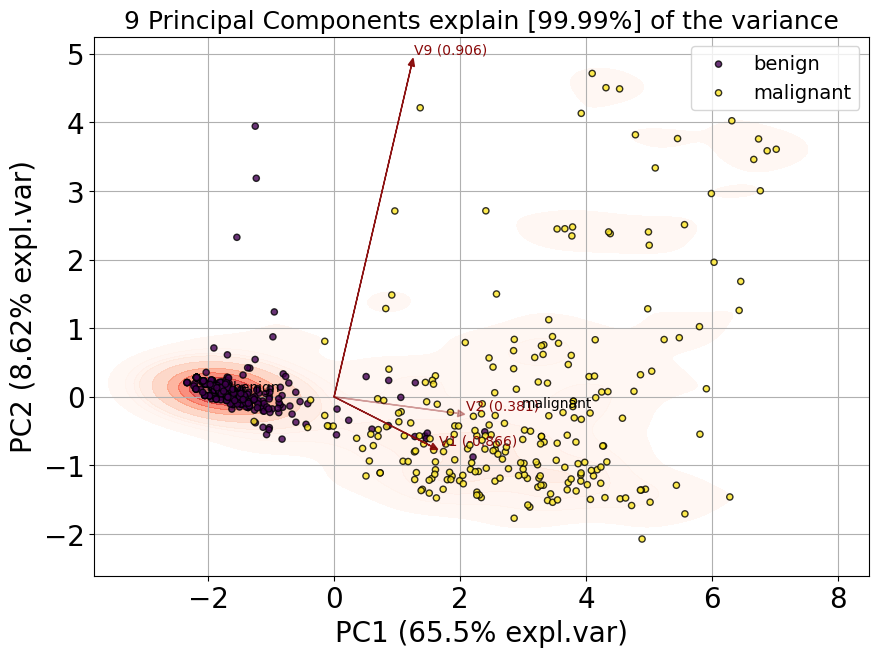

In [38]:
_ = model.biplot(cmap='viridis', labels=y, density=True, s=20, n_feat=3, fontsize=10, figsize=(10, 7))

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


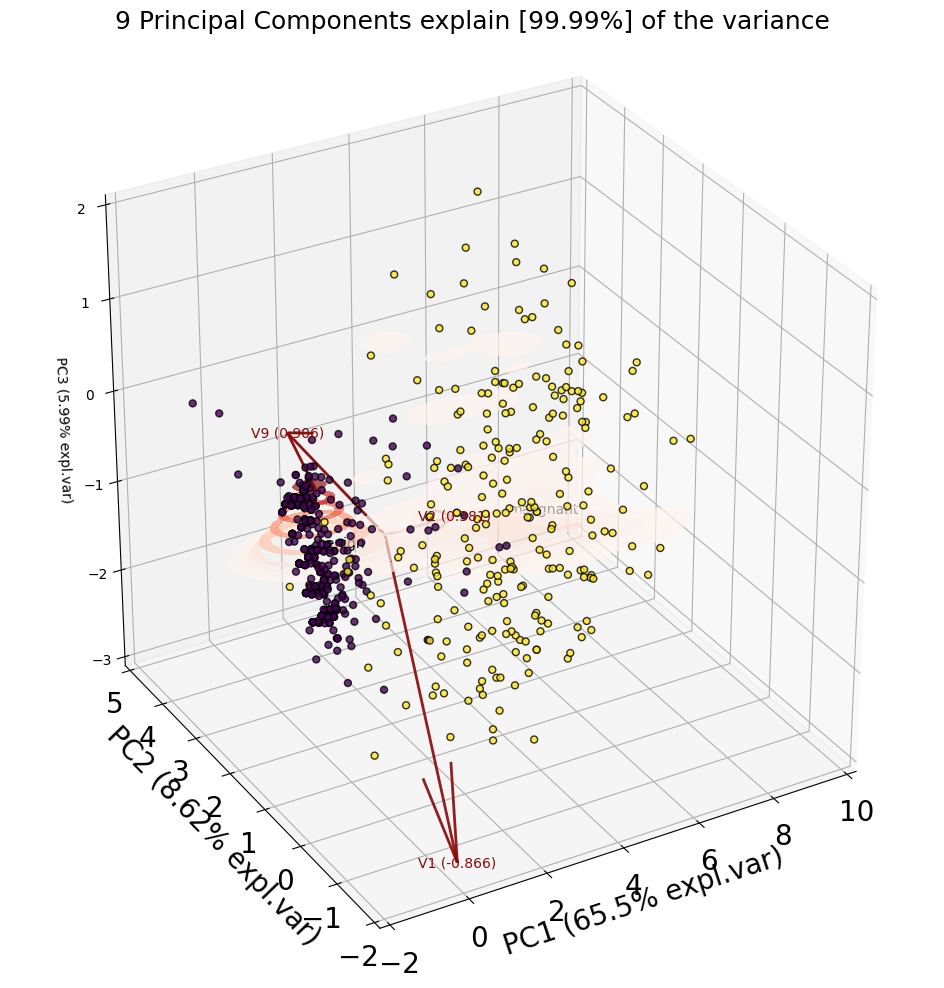

In [39]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 12))
_ = ax.view_init(azim=-120, elev=30)
_ = ax.set_xlim(-2, 10)
_ = ax.set_ylim(-2, 5)
_ = ax.set_zlim(-3, 2)
_ = ax.set_box_aspect((1, 1, 1), zoom=1)
_ = model.biplot3d(ax=ax, legend=False, density=True, fontsize=10, s=25, n_feat=3, labels=y, cmap='viridis')

[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


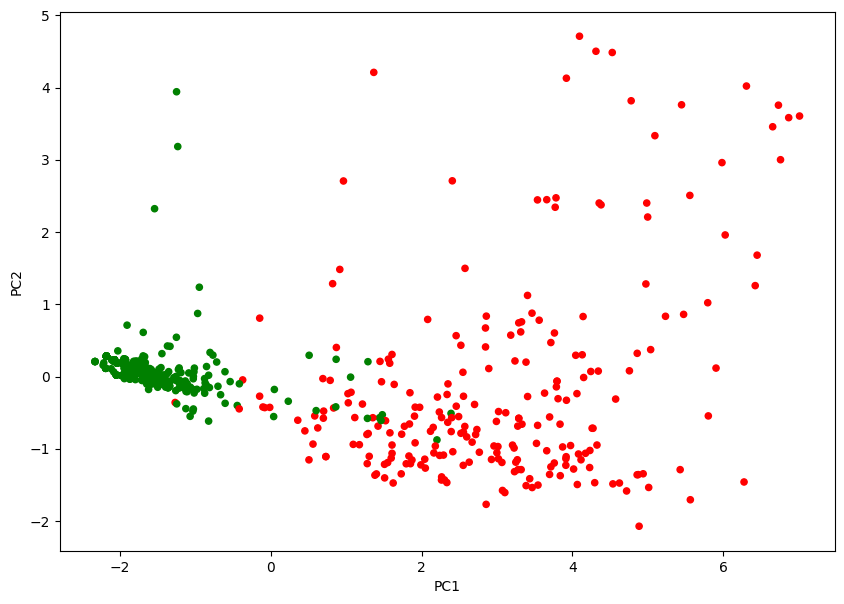

In [40]:
model = pca(normalize=True, n_components=4)  # 90% van de variantie overhouden in de PC componenten
_ = model.fit_transform(X, verbose=False)
colors = ['green' if biopsy_class == 'benign' else 'red' for biopsy_class in biopsy.dropna()['class']]
_ = model.transform(X).pipe(pd.DataFrame).plot(kind='scatter', x='PC1', y='PC2', c=colors, figsize=(10, 7))


In [41]:
display(model.transform(X))

[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC1,PC2,PC3,PC4
mapped,-1.470171,-0.104273,-0.565685,-0.031959
mapped,1.442046,-0.570141,0.236601,-0.478150
mapped,-1.592478,-0.076120,0.048858,-0.092388
mapped,1.479812,-0.528452,-0.603048,1.410827
mapped,-1.344862,-0.090719,0.029997,-0.338284
...,...,...,...,...
mapped,-1.723605,0.184232,-0.085730,0.110661
mapped,-2.074148,0.231929,0.182329,0.093465
mapped,3.789261,-0.142209,0.662144,2.496133
mapped,2.240007,-1.091287,1.031890,0.678641
